In [1]:
import os
import numpy as np
import pandas as pd
#
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
#
import time


In [2]:
test = torch.rand(size = (1,1000))

In [5]:
test.shape

torch.Size([1, 1000])

In [4]:
def Masking(channel: torch.Tensor, window: int= 250):
    '''
    Set to zero 
    Input: \\
    -channel = Tensor \\
    -window = Number of samples to set to zero
    Output: Numpy array masked
    '''
    # st = time.time()
    # New
    size = channel.size()
    mask = torch.ones(size)
    for i in range(size[0]):
        # real_window = torch.randint(0,window,(1,1)).item()
        start = torch.randint(0, size[1] - window + 1, (1,))
        mask[i, start:(start + window)] = 0
    masked = channel * mask
    # et = time.time()
    # print(f"total time = {et - st} s")
    return masked


In [20]:
torch.randint(0,250,(1,1)).item()

63

In [5]:
a = Masking(test)

total time = 0.045877695083618164 s


In [6]:
def DCVoltage(channel : torch.Tensor, max_magnitude: float = 0.5):
    ''' 
    Add a DC component between [-max_mangitude, max_magnitude]\\
    Input:  \\
    -channel = Tensor \\
    -max_magnitude = max value to be added
    Output: Numpy array 
    '''
    # st = time.time()
    size = channel.size()
    dc_comp = (torch.rand(size[0])*2 - 1)*max_magnitude
    dc_comp = dc_comp.view(-1, 1)
    # print(dc_comp.size())
    channel = torch.add(channel, dc_comp)
    # et = time.time()
    # print(f"total time = {et - st} s")
    return channel    

In [7]:
a = DCVoltage(test)

total time = 0.0010623931884765625 s


In [8]:
def GaussianNoise(channel: torch.Tensor, std: float = 10):
    '''
    Add Gaussian Noise with zero mean and std deviation
    Input:  -channel = Numpy array
            -std = Gaussian std
    Output: Channel with additive gaussian noise added
    '''
#     st = time.time()
    size = channel.size()
    noise = torch.normal(mean = 0.0, std = std, size = size)
    # noise = np.random.normal(loc = 0, scale= std, size= channel_size)
    noisy_channel = torch.add(channel, noise)
#     et = time.time()
#     print(f"total time = {et - st} s")
    return noisy_channel

In [9]:
a = GaussianNoise(test)

total time = 0.014564037322998047 s


In [10]:
def Amplitude(channel: torch.Tensor, max_amp: float = 1.5):
    # st = time.time()
    size = channel.size()
    factors = (torch.rand(size[0])*2 - 1)*max_amp
    factors = factors.view(-1, 1)
    channel = torch.mul(channel, factors)
    # et = time.time()
    # print(f"total time = {et - st} s")
    return channel

In [11]:
a = Amplitude(test)

total time = 0.001004934310913086 s


In [27]:
def Time_Shift(channel: torch.Tensor, min_shift: int = -50, max_shift: int = 50):
    # st = time.time()
    shift = int(torch.randint(low = min_shift, high = max_shift, size = (1, ))/2)
    shift_ch = F.pad(channel.unsqueeze(2), (0, 0, shift, -shift), mode = "reflect").squeeze(2)

    # et = time.time()
    # print(f"total time = {et - st} s")
    return shift_ch

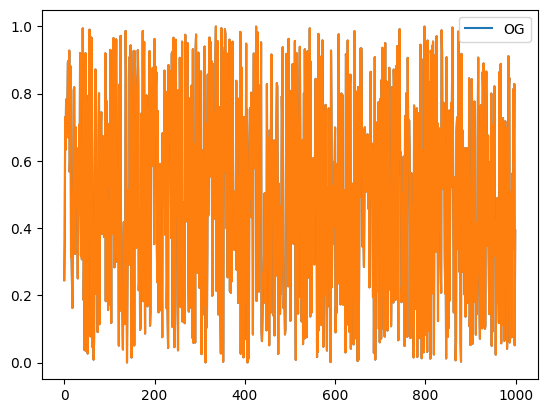

In [38]:
a = Time_Shift(test)
plt.plot(test.squeeze(), label = "OG")
plt.plot(a.squeeze())
plt.legend()
plt.show()